### Load libraries/ data

Load and explore the shape of the dataset


In [245]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [338]:
glass = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data", names = ['Id', 'Refractive_Index','Sodium', 'Magnesium', 'Aluminum', 'Silicon',
              'Potassium', 'Calcium', 'Barium', 'Iron', 'Type'], index_col = 'Id' )

In [339]:
glass.head()

,Refractive_Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
glass.shape

(214, 10)

In [7]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
Refractive_Index    214 non-null float64
Sodium              214 non-null float64
Magnesium           214 non-null float64
Aluminum            214 non-null float64
Silicon             214 non-null float64
Potassium           214 non-null float64
Calcium             214 non-null float64
Barium              214 non-null float64
Iron                214 non-null float64
Type                214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [8]:
glass.describe()
# count indicates that there are no missing values

,Refractive_Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Summarize Data

Descriptive statistics

Correlation matrix

Univariate and bivariate analysis and visualizations

In [11]:
correlation = glass.corr()

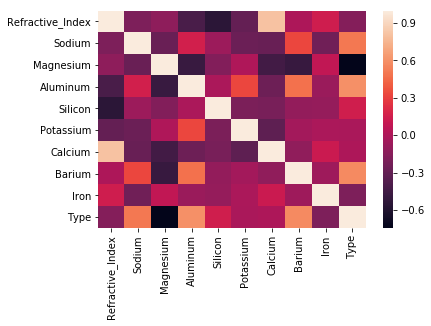

In [249]:
sns.heatmap(correlation)

In [13]:
# for the sake of this assignment:
# univariate analysis = histograms, kde
# bivariate analysis = scatterplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a240c9d30>,
      dtype=object)

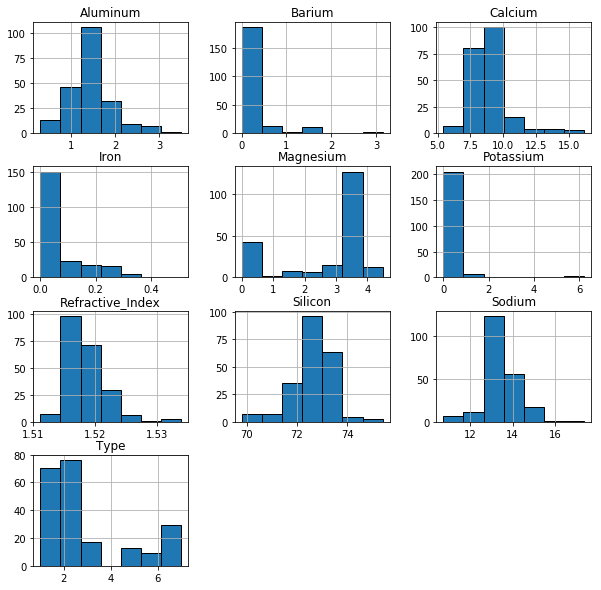

In [255]:
glass.hist(bins = 7, align = 'mid', ec='black', figsize= (10,10))

/Users/david/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


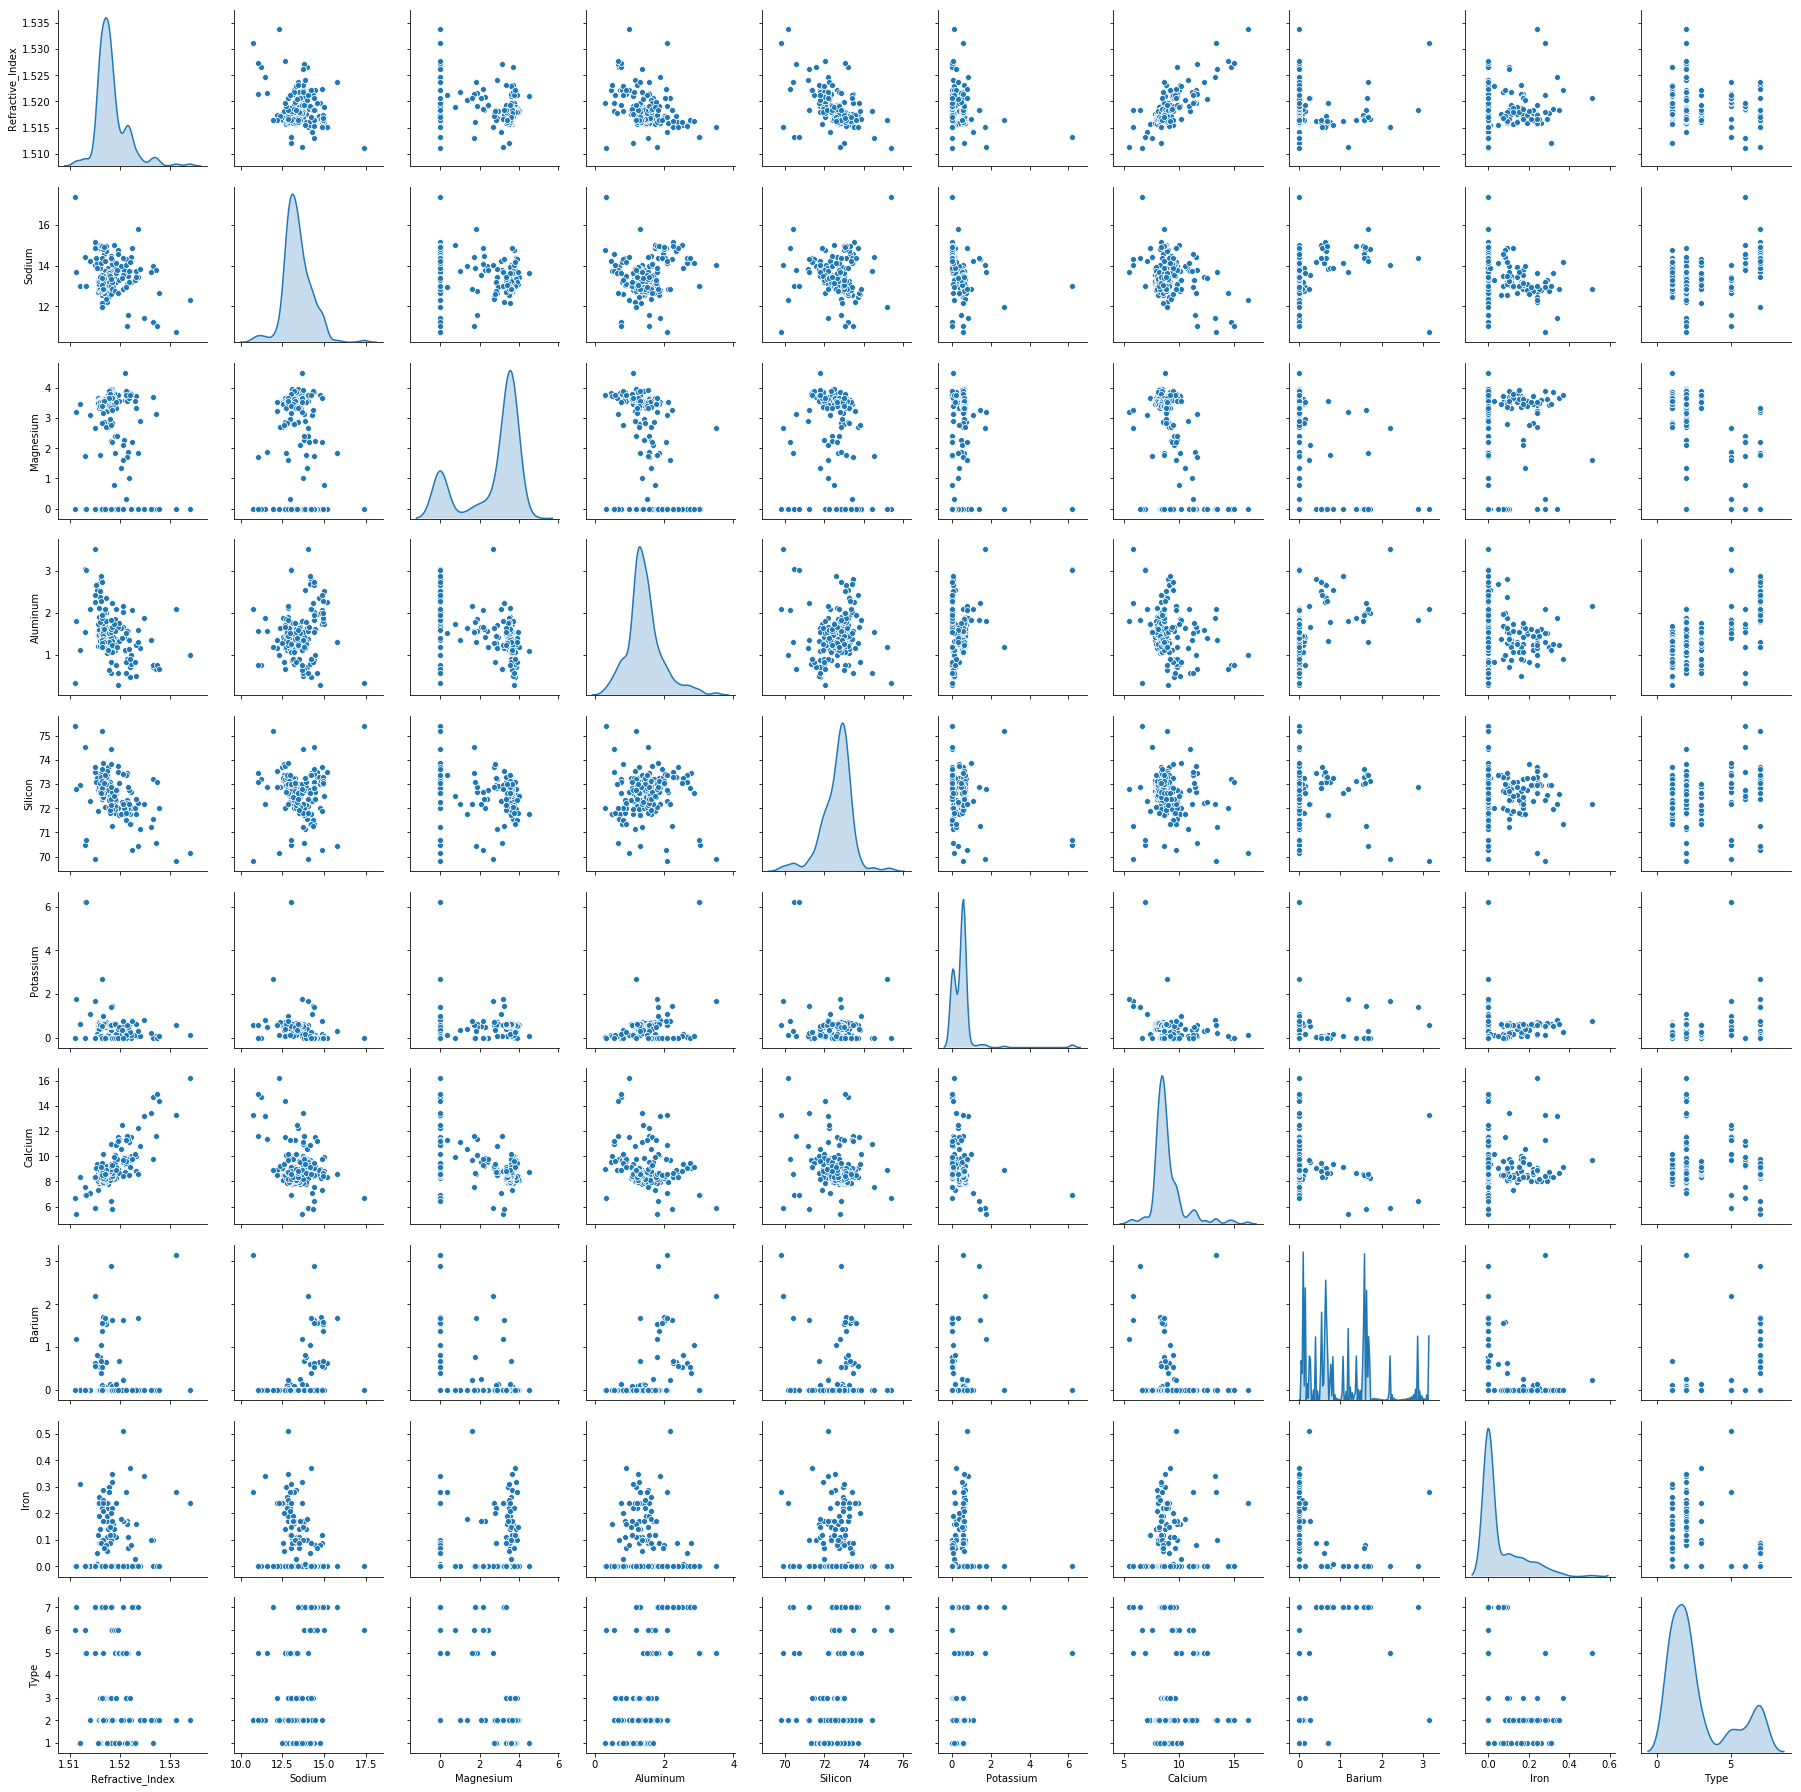

In [15]:
sns.pairplot(glass, diag_kind='kde')

### Data Preparation:

Data Cleaning: Do you need to clean the data?

Split-out validation dataset

Data transformation

In [16]:
# So far as I can tell, the data does not require any cleaning

In [256]:
y = glass.pop('Type')
X = glass

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [258]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(171, 9) (171,)
(43, 9) (43,)


### Baseline model: train a KNN classifier to serve as the baseline.



In [259]:
knn = KNeighborsClassifier(n_neighbors=12, p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

In [260]:
y_pred = knn.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.60
Misclassified samples: 17


Text(0,0.5,'Predicted Type')

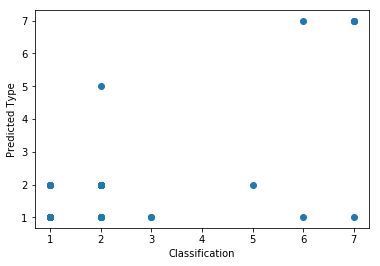

In [261]:
plt.scatter(y_test, y_pred)
plt.xlabel('Classification')
plt.ylabel('Predicted Type')
# issue: several predictions shown as a single point, but in theory a graph of this sort could be useful

 Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps

---- non float processed window interpreted as float processed

### now with k-folds cross validation:

In [262]:
# creating list of K for KNN
k_list= list(range(1,50))

In [263]:
neighbors = list(filter(lambda x: x % 2 != 0, k_list))

In [280]:
# empty list that will hold cv scores
cv_scores = []

In [265]:
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=9, scoring='accuracy')
    cv_scores.append(scores.mean())

/Users/david/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=9.
  % (min_labels, self.n_folds)), Warning)
/Users/david/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=9.
  % (min_labels, self.n_folds)), Warning)
/Users/david/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=9.
  % (min_labels, self.n_folds)), Warning)
/Users/david/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 7 members, which is too few. The 

In [266]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


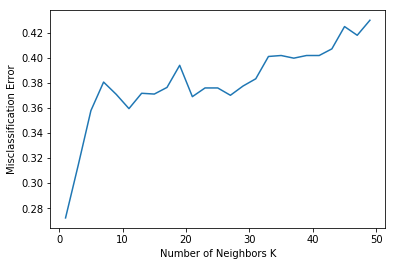

In [267]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### ** Best Value of K is 1

K=1 corresponds to the smallest misclassification error

### Apply Diagnostics:

In [268]:
# 1) resclae
# 2) PCA
# 3) weighted voting
# 4) distance metric

In [270]:
scaler = StandardScaler()
print(scaler.fit(X))
scaled_features = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [271]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(171, 9) (171,)
(43, 9) (43,)


/Users/david/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=9.
  % (min_labels, self.n_folds)), Warning)
/Users/david/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=9.
  % (min_labels, self.n_folds)), Warning)
/Users/david/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=9.
  % (min_labels, self.n_folds)), Warning)
/Users/david/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 7 members, which is too few. The 

The optimal number of neighbors is 5


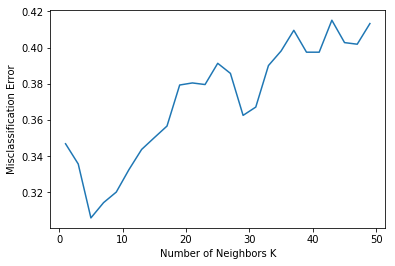

In [279]:
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    scores = cross_val_score(knn, X_train, y_train, cv=9, scoring='accuracy')
    cv_scores.append(scores.mean())
    # changing to misclassification error
MSE = [1 - x for x in cv_scores]
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [274]:
# important to clear cv_scores (by rerunning)

In [320]:
pca = PCA(n_components=5).fit(scaled_features)
princomps = pca.transform(scaled_features)
X_train, X_test, y_train, y_test = train_test_split(princomps, y, test_size=0.2)

/Users/david/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/Users/david/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/Users/david/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/Users/david/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 7 members, which is too few. T

The optimal number of neighbors is 9


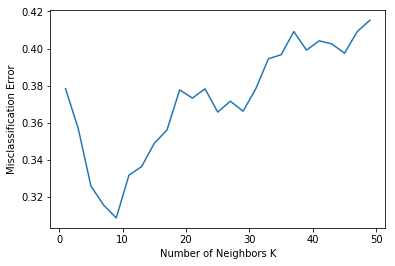

In [281]:
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [287]:
cv_scores = []

In [283]:
# so far, rescaling and PCA have not significantly improved the model, let's try weighted voting

/Users/david/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/Users/david/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/Users/david/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/Users/david/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 7 members, which is too few. T

The optimal number of neighbors is 9


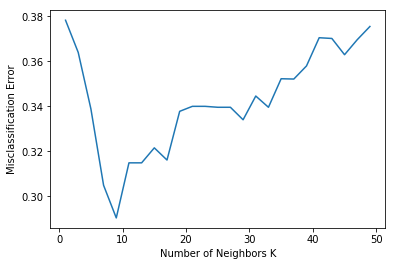

In [285]:
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [286]:
# and now consider different metrics with which to evaluate the distance 
# (only the misclassification minimizing results shown)

In [297]:
import warnings; warnings.simplefilter('ignore')

The optimal number of neighbors is 7


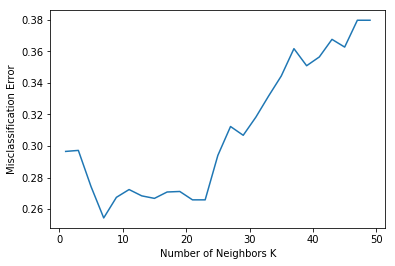

In [327]:
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric = 'manhattan')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
# 5 PC's used here, but three in other training

In [326]:
cv_scores = []

In [314]:
# Maybe it is an acceptable level of improvement

### Confusion matrix and overall accuracy

In [359]:
knn = KNeighborsClassifier(n_neighbors=7, weights = 'distance', metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.65
Misclassified samples: 15


In [360]:
confusion_matrix(y_test, y_pred)

array([[10,  2,  0,  0,  0,  0],
       [ 3, 13,  0,  0,  1,  0],
       [ 4,  3,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  4]])

In [361]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [334]:
# the above function is taken from scikit docs

In [354]:
class_names = [1,2,3,5,6,7]
# not the right way to do this, but it wil do in this case

In [351]:
import itertools

Confusion matrix, without normalization
[[10  2  0  0  0  0]
 [ 3 13  0  0  1  0]
 [ 4  3  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  0  0  0  0]
 [ 0  1  0  0  0  4]]


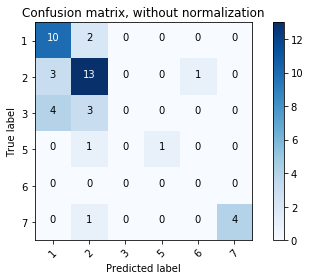

In [363]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

In [356]:
y_test
# to verify the ad hoc labeling will work

Id
109    2
32     1
108    2
81     2
176    5
136    2
118    2
125    2
198    7
101    2
152    3
156    3
155    3
103    2
73     2
169    5
151    3
115    2
50     1
213    7
159    3
35     1
95     2
102    2
36     1
40     1
39     1
49     1
114    2
207    7
154    3
13     1
153    3
84     2
202    7
57     1
210    7
68     1
128    2
47     1
9      1
71     2
139    2
Name: Type, dtype: int64